# Simple Linear Regression Model

(1000, 2)
(1000, 1)
[[-0.05922155]
 [-0.03270626]]
[0.05211752]
[[ 2.00632215]
 [-3.00188608]] [4.34420231]


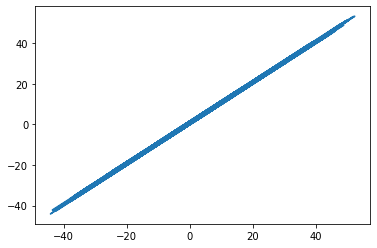

In [5]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
# Generate randome data to train the model
# y = 2*xs - 3*zs + 5

N = 1000
xs = np.random.uniform(-10,10,(N,1))
zs = np.random.uniform(-10,10,(N,1))
inputs = np.column_stack((xs, zs)) # inputs data
print(inputs.shape) 

noises = np.random.uniform(-1,1,(N,1)) # target noise
targets = 2 * xs - 3 * zs + 5 + noises # targets data
print(targets.shape)

# Model - Initialize variables of linear regression model (w, b)
init_range = 0.1
weights = np.random.uniform(-init_range, init_range, (2,1))
biases = np.random.uniform(-init_range,init_range, 1)
print(weights)
print(biases)

# Model - Set learning rate for optimizaiton function
learning_rate = 0.02

# Model - Training model step by step
for i in range(100): # set 100 training steps
    # calculate outputs based on current model parameter weight, bias
    outputs = np.dot(inputs, weights) + biases

    # calcuate objective function Loss = L(y,t) = SUM((yi - ti) ^2) / 2/ N
    Deltas = outputs - targets
    Deltas_scaled = Deltas/N
    Loss = np.sum(Deltas**2)/2/N

    # update model parameters
    weights = weights - learning_rate * np.dot(inputs.T, Deltas_scaled)
    biases = biases - learning_rate * np.sum(Deltas_scaled)

# Model - print weights. biases, loss after 100 times
print(weights, biases)

# Plot targets vs. outputs
plt.plot(outputs, targets)
plt.show()

# Linear Model With TensorFlow

## Import Tensorflow libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation for Tensorflow
* Tensorflow model use npz files 

In [7]:
N =1000
xs = np.random.uniform(-10,10,(N,1))
zs = np.random.uniform(-10,10,(N,1))
generated_inputs = np.column_stack((xs, zs)) 
noises = np.random.uniform(-1,1,(N,1)) # target noise
generated_targets = 2 * xs - 3 * zs + 5 + noises # targets data

# save into an npz file called "TF_intro"
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Load data for Tensorflow models

In [8]:
training_data = np.load('TF_intro.npz')

## Build Tensorflow samples

In [14]:
# set input and output size
input_size = 2 # number of parameters inputed to the model (xs, zs)
output_size = 1 # number of output the model (y)

# Outline the model in tf.keras.Sequential()
# Only one output layer based on linear regression
model = tf.keras.Sequential([
    # Dense layer for xw + b
    tf.keras.layers.Dense(
        output_size,
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
    # Dense implements the operation: output = activation(dot(input, kernel) + bias)
])

# Set objective function and objective function by model compile
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

## Extract Weights and Bias

## Fit Tensorflow model with training data

In [15]:
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
32/32 - 0s - loss: 24.7939
Epoch 2/100
32/32 - 0s - loss: 1.3206
Epoch 3/100
32/32 - 0s - loss: 0.4799
Epoch 4/100
32/32 - 0s - loss: 0.3951
Epoch 5/100
32/32 - 0s - loss: 0.3780
Epoch 6/100
32/32 - 0s - loss: 0.4159
Epoch 7/100
32/32 - 0s - loss: 0.3814
Epoch 8/100
32/32 - 0s - loss: 0.4177
Epoch 9/100
32/32 - 0s - loss: 0.3921
Epoch 10/100
32/32 - 0s - loss: 0.3783
Epoch 11/100
32/32 - 0s - loss: 0.3671
Epoch 12/100
32/32 - 0s - loss: 0.4065
Epoch 13/100
32/32 - 0s - loss: 0.4109
Epoch 14/100
32/32 - 0s - loss: 0.3752
Epoch 15/100
32/32 - 0s - loss: 0.3792
Epoch 16/100
32/32 - 0s - loss: 0.3825
Epoch 17/100
32/32 - 0s - loss: 0.3790
Epoch 18/100
32/32 - 0s - loss: 0.3877
Epoch 19/100
32/32 - 0s - loss: 0.3523
Epoch 20/100
32/32 - 0s - loss: 0.3907
Epoch 21/100
32/32 - 0s - loss: 0.3780
Epoch 22/100
32/32 - 0s - loss: 0.3748
Epoch 23/100
32/32 - 0s - loss: 0.3581
Epoch 24/100
32/32 - 0s - loss: 0.3864
Epoch 25/100
32/32 - 0s - loss: 0.4113
Epoch 26/100
32/32 - 0s - loss: 0

In [16]:
model.layers[-1].get_weights()

[array([[ 2.0350442],
        [-2.996998 ]], dtype=float32),
 array([5.040723], dtype=float32)]

## Extract predictions

In [17]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 50.6],
       [  4.9],
       [  3.7],
       [ 15.7],
       [ 47.9],
       [ 37.2],
       [  9.4],
       [ 18.1],
       [ 23.8],
       [ 16.5],
       [ -5.8],
       [  9.1],
       [ 24. ],
       [ -7.9],
       [-13.7],
       [-20.3],
       [ 15. ],
       [-24. ],
       [ 12.6],
       [ 19.1],
       [  1.9],
       [ -6.4],
       [ -8. ],
       [  6.5],
       [ -8.4],
       [ 21.2],
       [  5.8],
       [ -0.9],
       [  9.8],
       [ 54.7],
       [ 12.2],
       [-16.2],
       [ -1.7],
       [  8.3],
       [ 16.8],
       [-34.4],
       [-17. ],
       [ 43.6],
       [ 20. ],
       [ 40.1],
       [  7.1],
       [-27.9],
       [ 14.2],
       [ 15.1],
       [  0.9],
       [ 39.4],
       [ -1. ],
       [ 30.6],
       [ 11.5],
       [ 15.6],
       [ 20. ],
       [  9.8],
       [ 18.9],
       [ 51.3],
       [ 11.6],
       [-20.7],
       [ -0.8],
       [-35.4],
       [ -1.6],
       [ 17.5],
       [  3.2],
       [  6.6],
       [

In [18]:
training_data['targets'].round(1)

array([[ 50.4],
       [  5.4],
       [  4.1],
       [ 15.4],
       [ 47.1],
       [ 37.5],
       [  9.4],
       [ 18.3],
       [ 23.1],
       [ 16.5],
       [ -5.9],
       [  9.4],
       [ 24.8],
       [ -7.1],
       [-13.5],
       [-19.3],
       [ 14.8],
       [-24.2],
       [ 13.1],
       [ 18.6],
       [  2.2],
       [ -7.5],
       [ -7.7],
       [  6.6],
       [ -7.5],
       [ 20.8],
       [  5.2],
       [ -0.6],
       [  9.2],
       [ 54.9],
       [ 11.2],
       [-15.4],
       [ -1.3],
       [  9.2],
       [ 16.1],
       [-33.6],
       [-16.9],
       [ 42.9],
       [ 19.5],
       [ 40. ],
       [  7.8],
       [-27.3],
       [ 13.7],
       [ 14.3],
       [  0.4],
       [ 39.5],
       [ -0.6],
       [ 30.5],
       [ 10.8],
       [ 15.9],
       [ 19.8],
       [ 10.8],
       [ 19.7],
       [ 52. ],
       [ 12.2],
       [-20.7],
       [ -0.6],
       [-34.3],
       [ -1.5],
       [ 18.1],
       [  3.1],
       [  5.7],
       [

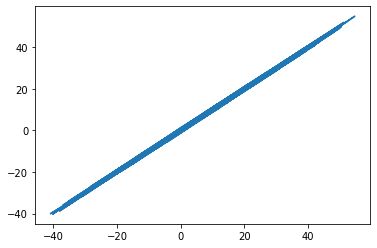

In [19]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))